## **EDA - AI / ML / Data Science Salaries**

## **About**
This dataset captures real-world salary data for jobs in Data Science, Artificial Intelligence, and Machine Learning from 2020 to 2025. Each row represents a reported salary, enriched with attributes like job title, experience level, company size, remote work ratio, and geographic context. This data is valuable for analyzing salary trends over time, comparing roles across countries, and exploring compensation based on experience, work setting, and more.

### **Dataset Link**
https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

### **Columns Description:**
- **work_year**: The year the salary was reported. Covers salaries from 2020 through 2025.
- **experience_level**: The seniority level of the employee at the time of reporting. Common values include:
    - EN: Entry-level / Junior
    - MI: Mid-level / Intermediate
    - SE: Senior-level
    - EX: Executive / Director
- **employment_type**: The type of employment contract:
        - FT: Full-time
        - PT: Part-time
        - CT: Contract
        - FL: Freelance
- **job_title**: The employee’s specific job title (e.g., Data Scientist, ML Engineer, AI Specialist, Research Scientist).
- **salary**: The employee's gross annual salary in the original reported currency, before taxes and deductions.
- **salary_currency**: The currency in which the salary was originally paid (e.g., USD, EUR, INR).
- **salary_in_usd**: The employee's salary converted into USD using 2025 exchange rates for standardized comparison.

- **employee_residence**: The country (ISO 3166-1 alpha-2 code) where the employee resides. This may differ from the company location, especially in remote roles.

- **remote_ratio**: Indicates the percentage of remote work:
    - 0: No remote work (On-site)
    - 50: Hybrid (partially remote)
    - 100: Fully remote

- **company_location**: The country (ISO 3166-1 alpha-2 code) where the company or employer is headquartered.
- **company_size**: The size of the employing organization:
    - S: Small (1–50 employees)
    - M: Medium (51–500 employees)
    - L: Large (501+ employees)

In [295]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [296]:
df = pd.read_csv('salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [297]:
df['work_year'].unique()

array([2025, 2024, 2022, 2023, 2020, 2021])

In [298]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [299]:
df['remote_ratio'].unique()

array([100,   0,  50])

In [300]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [301]:
df.shape

(133349, 11)

In [302]:
# Checking Null Values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           133349 non-null  int64 
 1   experience_level    133349 non-null  object
 2   employment_type     133349 non-null  object
 3   job_title           133349 non-null  object
 4   salary              133349 non-null  int64 
 5   salary_currency     133349 non-null  object
 6   salary_in_usd       133349 non-null  int64 
 7   employee_residence  133349 non-null  object
 8   remote_ratio        133349 non-null  int64 
 9   company_location    133349 non-null  object
 10  company_size        133349 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.2+ MB


In [304]:
grouped = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
px.bar(grouped,x='employment_type',y='salary_in_usd',title="Comparision of Employement Type with Salary")

Text(0.5, 1.0, 'Comparision of Employement Type with Salary')

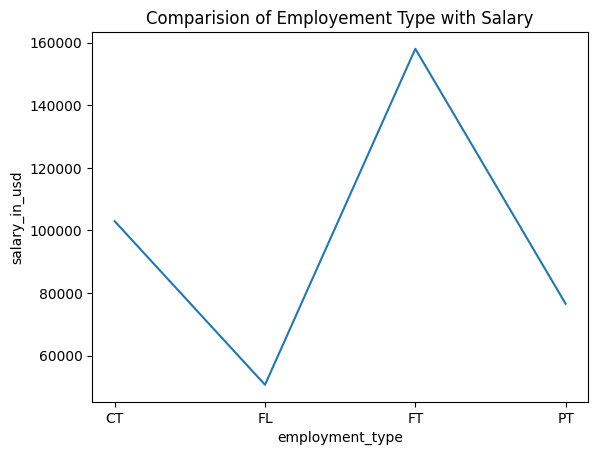

In [305]:
sns.lineplot(grouped,x='employment_type',y='salary_in_usd')
plt.title("Comparision of Employement Type with Salary")

In [306]:
grouped = df.groupby('experience_level')['salary_in_usd'].mean()
grouped = grouped.reset_index()
px.bar(grouped,x='experience_level',y='salary_in_usd',title="Comparision of Experience Level with Salary")

Text(0.5, 1.0, 'Comparision of Experience Level with Salary')

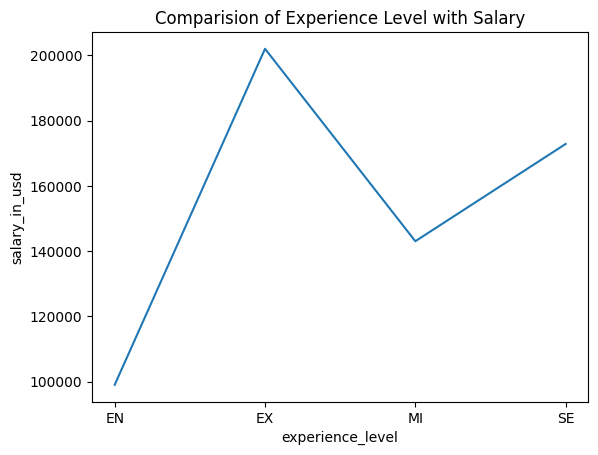

In [307]:
sns.lineplot(grouped,x='experience_level',y='salary_in_usd')
plt.title("Comparision of Experience Level with Salary")

In [308]:
grouped = df.groupby('work_year')['salary_in_usd'].mean()
grouped = grouped.reset_index()
grouped
px.bar(grouped,x='work_year',y='salary_in_usd',title="Comparision of Work Year with Salary")

Text(0.5, 1.0, 'Comparision of Work Year with Salary')

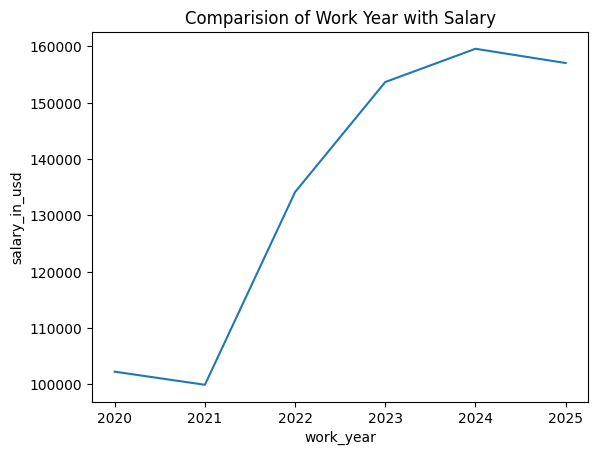

In [309]:
sns.lineplot(grouped,x='work_year',y='salary_in_usd')
plt.title("Comparision of Work Year with Salary")

In [310]:
grouped = df.groupby('company_size')['salary_in_usd'].mean()
grouped = grouped.reset_index()
grouped
px.bar(grouped,x='company_size',y='salary_in_usd',title="Comparision of Company Size with Salary")


In [311]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [312]:
df['JobType'] = df['remote_ratio'].replace({0:"Onsite",50:"Hybrid",100:"Remote"})

In [313]:
grouped = df.groupby('JobType')['salary_in_usd'].mean()
grouped = grouped.reset_index()
grouped
px.bar(grouped,x='JobType',y='salary_in_usd',title="Comparision Job Type with Salary")

In [314]:
df['job_title'].nunique()

390

In [315]:
df['job_title'].unique()

array(['Solutions Engineer', 'Data Engineer', 'Data Scientist',
       'BI Developer', 'Data Analyst', 'Applied Scientist',
       'Systems Engineer', 'Director', 'Associate', 'Software Engineer',
       'Consultant', 'Analyst', 'Product Manager', 'Software Developer',
       'Engineer', 'Developer', 'Data Specialist', 'Manager',
       'Research Scientist', 'Software Architect',
       'Data Management Analyst', 'Data Reporter',
       'Computational Biologist', 'Product Designer',
       'Software Development Engineer', 'Architect',
       'Data Analytics Manager', 'Principal Statistical Programmer',
       'Cloud Engineer', 'Data Architect', 'Product Owner', 'Executive',
       'Business Intelligence Engineer', 'Data Governance Lead',
       'Data Governance Specialist', 'AI Engineer', 'Solutions Architect',
       'AI Researcher', 'Machine Learning Engineer', 'Bear Robotics',
       'Data Strategist', 'Research Engineer', 'Researcher',
       'Business Analyst', 'Solution Engineer'

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

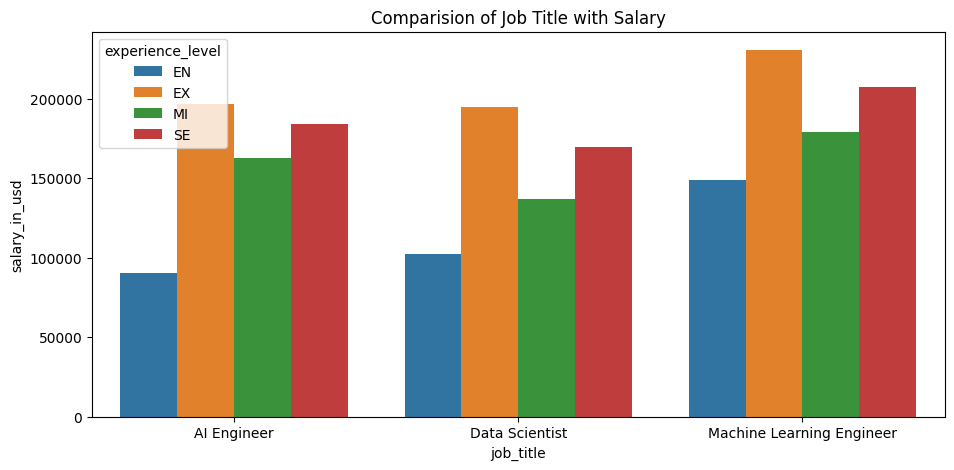

In [316]:
plt.figure(figsize=(11,5))
selected_jobs = df[df['job_title'].isin([
    "Data Scientist", "AI Engineer", "Machine Learning Engineer"
])]

grouped = selected_jobs.groupby(['job_title','experience_level'])['salary_in_usd'].mean().reset_index()
sns.barplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

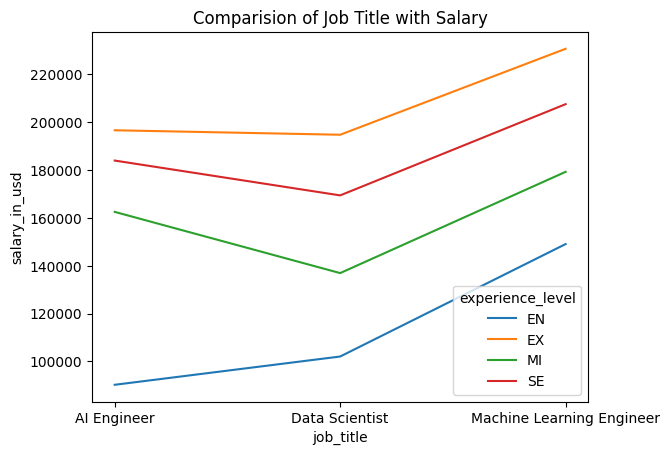

In [317]:
sns.lineplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

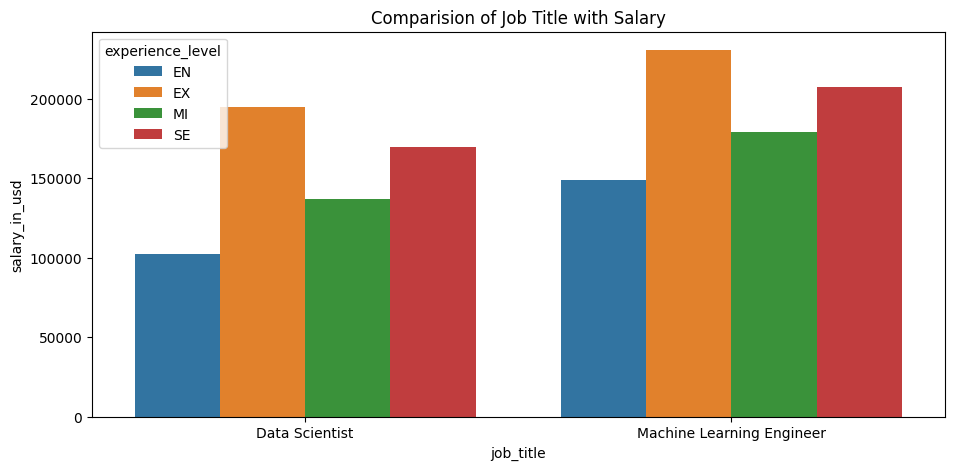

In [318]:
plt.figure(figsize=(11,5))
selected_jobs = df[df['job_title'].isin([
    "Data Scientist","Machine Learning Engineer",
])]

grouped = selected_jobs.groupby(['job_title','experience_level'])['salary_in_usd'].mean().reset_index()
sns.barplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

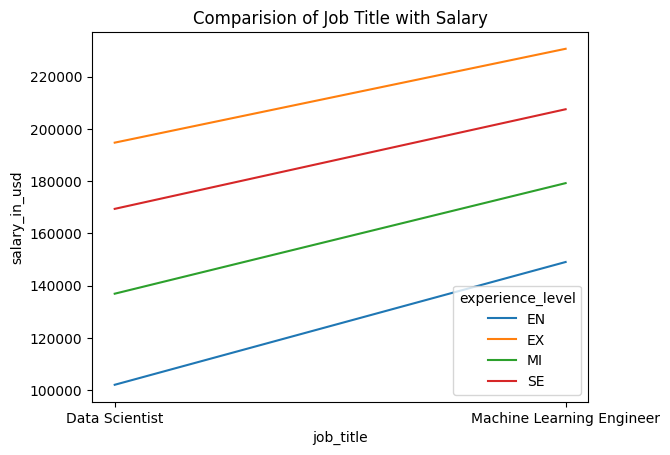

In [319]:
sns.lineplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

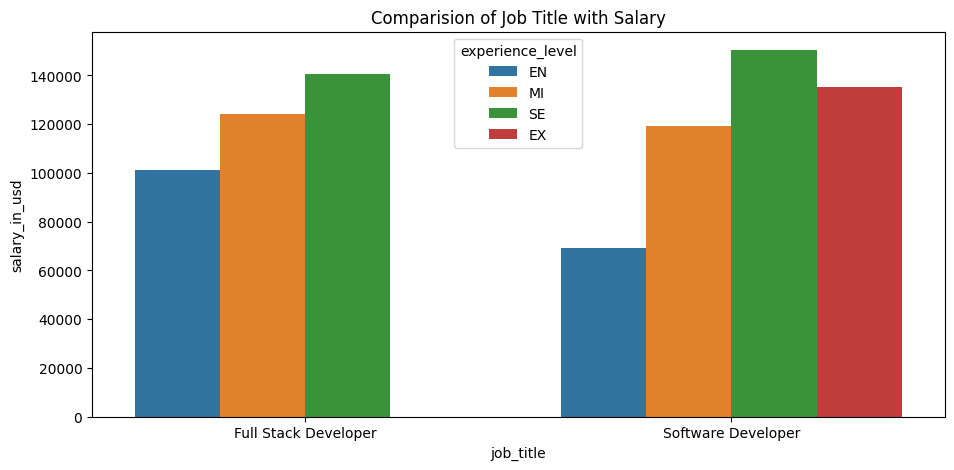

In [320]:
plt.figure(figsize=(11,5))
selected_jobs = df[df['job_title'].isin([
    "Software Developer","Full Stack Developer"
])]

grouped = selected_jobs.groupby(['job_title','experience_level'])['salary_in_usd'].mean().reset_index()
sns.barplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

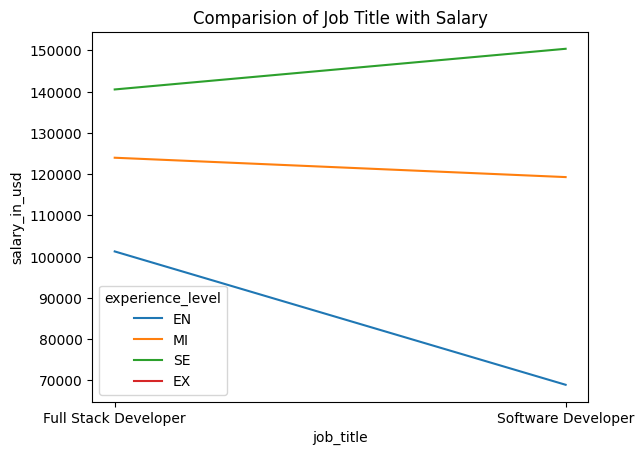

In [321]:
sns.lineplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

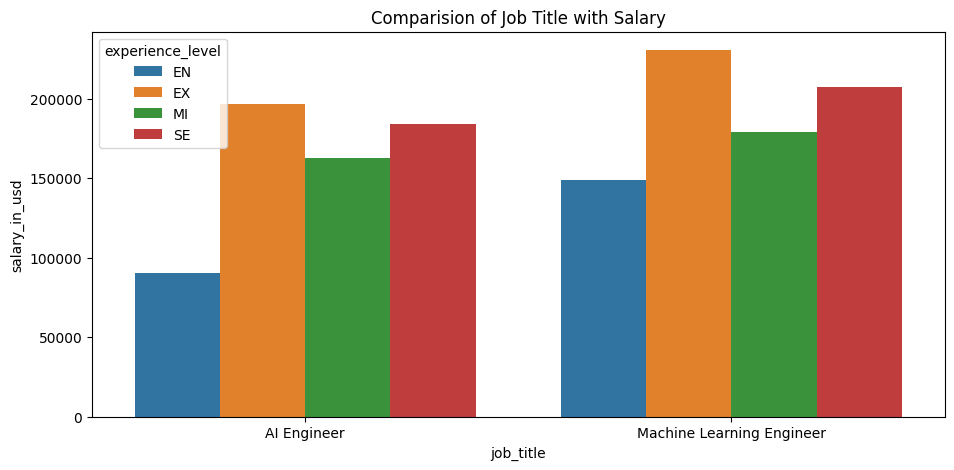

In [322]:
plt.figure(figsize=(11,5))
selected_jobs = df[df['job_title'].isin([
    "Machine Learning Engineer", "AI Engineer"
])]

grouped = selected_jobs.groupby(['job_title','experience_level'])['salary_in_usd'].mean().reset_index()
sns.barplot(grouped,x='job_title',y='salary_in_usd',hue='experience_level')
plt.title("Comparision of Job Title with Salary")

Text(0.5, 1.0, 'Comparision of Job Title with Salary')

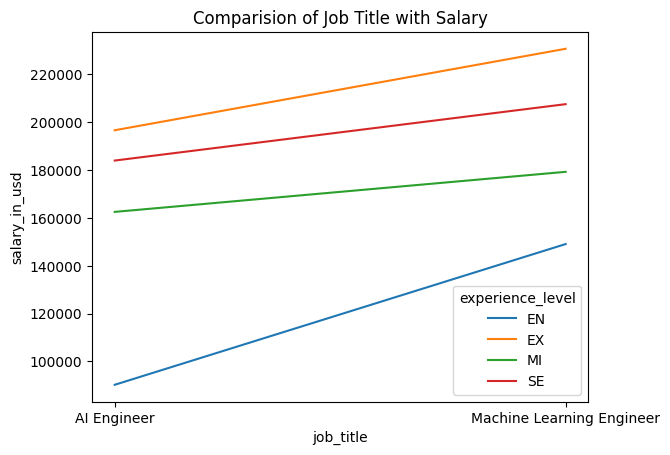

In [323]:
sns.lineplot(grouped,x='job_title',y='salary_in_usd',hue="experience_level")
plt.title("Comparision of Job Title with Salary")

In [324]:
top_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).reset_index().head(5)

px.bar(top_countries,x='company_location',y="salary_in_usd",title="Comparision of Company Location with Salary")

Text(0.5, 1.0, 'Comparision of Company Location with Salary')

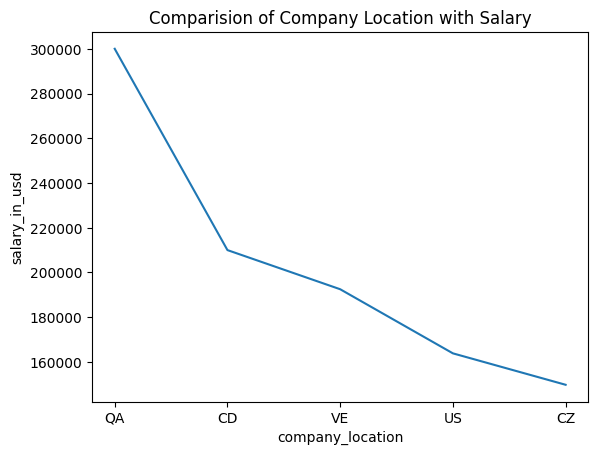

In [325]:
sns.lineplot(top_countries,x='company_location',y='salary_in_usd')
plt.title("Comparision of Company Location with Salary")

In [326]:
top_countries = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).reset_index().head(5)

px.bar(top_countries,x='company_location',y="salary_in_usd",title="Comparision of Company Location with Salary")

In [327]:
datascience = df[df['job_title']=="Data Scientist"]
top_countries_datascience = datascience.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).reset_index().head(10)

px.bar(top_countries_datascience,x='company_location',y="salary_in_usd",title="Comparision of Company Location with Salary")

In [328]:
datascience = df[df['job_title']=="AI Engineer"]
top_countries_datascience = datascience.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).reset_index().head(10)

px.bar(top_countries_datascience,x='company_location',y="salary_in_usd",title="Comparision of Company Location with Salary")

Text(0.5, 1.0, 'Comparision of Work Year with Salary')

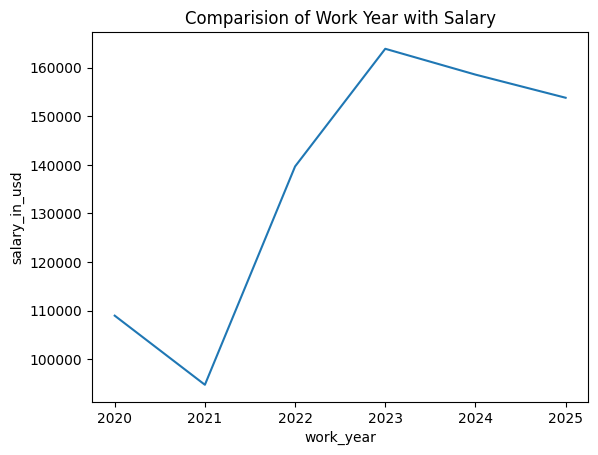

In [329]:
ai_engr = df[df['job_title']=="Data Scientist"]
ai_engr = ai_engr.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.lineplot(ai_engr,x="work_year",y="salary_in_usd")
plt.title("Comparision of Work Year with Salary")

Text(0.5, 1.0, 'Comparision of Work Year with Salary')

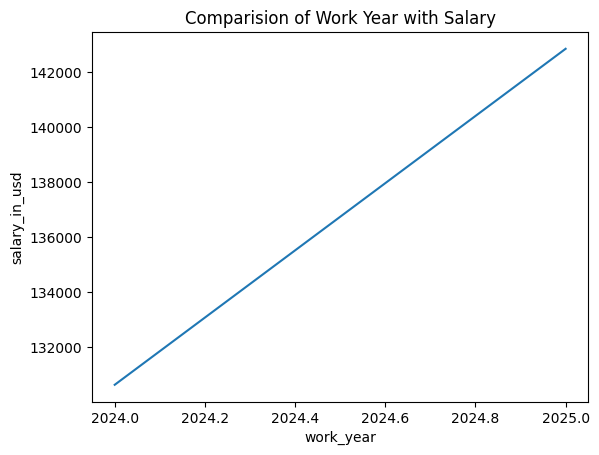

In [330]:
ai_engr = df[df['job_title']=="Artificial Intelligence Engineer"]
ai_engr = ai_engr.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.lineplot(ai_engr,x="work_year",y="salary_in_usd")
plt.title("Comparision of Work Year with Salary")

Text(0.5, 1.0, 'Comparision of Work Year with Salary')

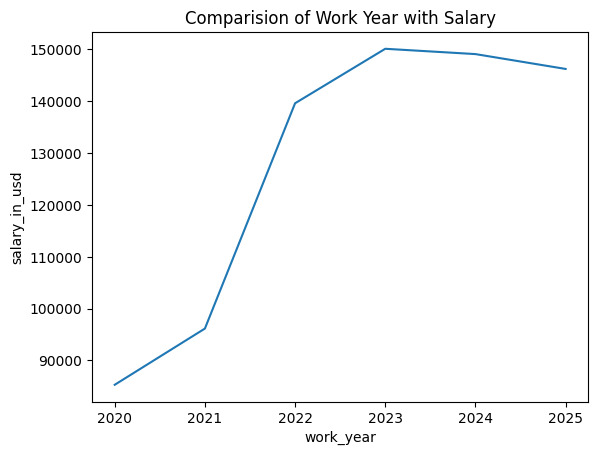

In [331]:
ai_engr = df[df['job_title']=="Data Engineer"]
ai_engr = ai_engr.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.lineplot(ai_engr,x="work_year",y="salary_in_usd")
plt.title("Comparision of Work Year with Salary")

Text(0.5, 1.0, 'Comparision of Work Year with Salary')

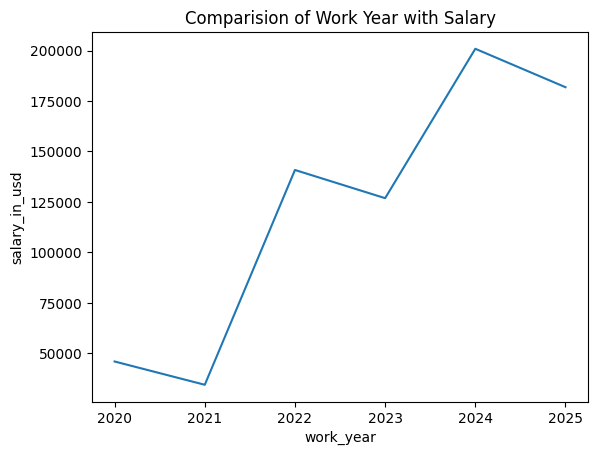

In [332]:
ai_engr = df[df['job_title']=="AI Scientist"]
ai_engr = ai_engr.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.lineplot(ai_engr,x="work_year",y="salary_in_usd")
plt.title("Comparision of Work Year with Salary")

Text(0.5, 1.0, 'Distribution of Salaries in USD')

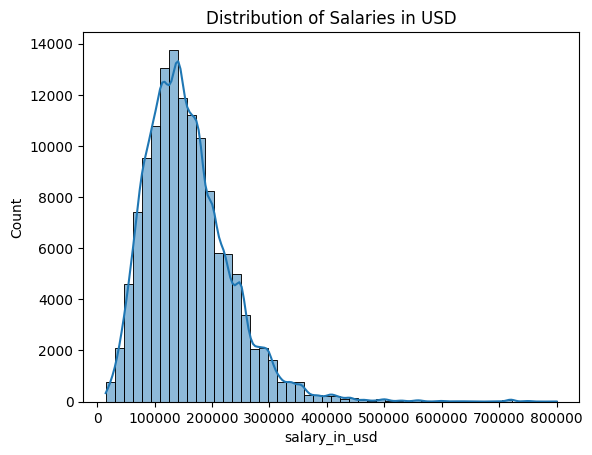

In [333]:
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title("Distribution of Salaries in USD")

In [334]:
remote_workers = df[df['JobType'] == "Remote"]
grouped = remote_workers.groupby(['employee_residence', 'company_location'])['salary_in_usd'].mean().reset_index()
top = grouped.sort_values('salary_in_usd', ascending=False).head(10)
px.bar(top, x='employee_residence', y='salary_in_usd', color='company_location',
       title="Top Remote Salaries by Residence and Company Location")

In [335]:
top_jobs = df['job_title'].value_counts().head(10).reset_index()
top_jobs.columns = ['job_title', 'count']
px.bar(top_jobs, x='job_title', y='count', title="Top 10 Most Common Job Titles")

In [336]:
exp_trend = df.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().reset_index()
px.line(exp_trend, x='work_year', y='salary_in_usd', color='experience_level', 
        title="Salary Trend by Experience Level Over Years")

In [337]:
remote_trend = df.groupby(['work_year', 'remote_ratio'])['salary_in_usd'].mean().reset_index()
remote_trend['remote_type'] = remote_trend['remote_ratio'].replace({0:"Onsite",50:"Hybrid",100:"Remote"})
px.line(remote_trend, x='work_year', y='salary_in_usd', color='remote_type', 
        title="Remote Ratio Salary Trend Over Years")

Text(0.5, 1.0, 'Correlation Heatmap')

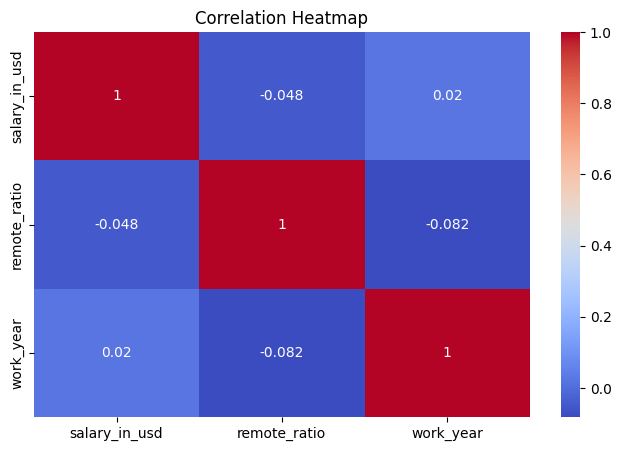

In [338]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[['salary_in_usd', 'remote_ratio', 'work_year']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Salary Range by Experience Level')

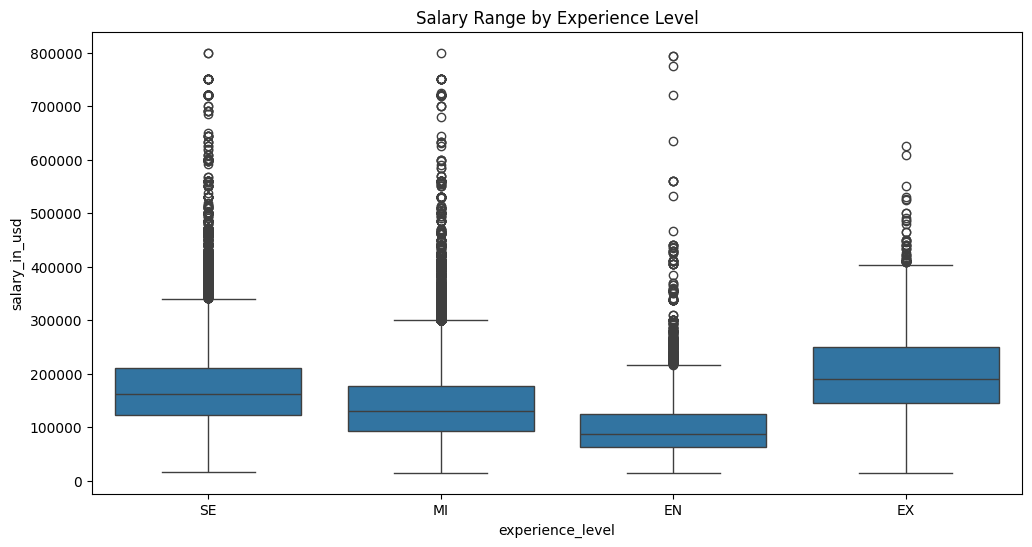

In [339]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title("Salary Range by Experience Level")

In [340]:
median_salaries = df.groupby('experience_level')['salary_in_usd'].median().reset_index()
px.bar(median_salaries, x='experience_level', y='salary_in_usd', title="Median Salary by Experience Level")